In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# rm_model_path = "/data/katie_kang/trlx/examples/ckpts/rm_ctrex_llama7B_special_tokens_50_50/checkpoint_01000/hf_model/"

# rm_model_path = "/data/katie_kang/trlx/examples/ckpts/rm_ctrex_llama7B_INCORRECT_uncertain_CORRECT_certain/checkpoint_10000/hf_model/"
# rm_model_path = "/data/katie_kang/trlx/examples/ckpts/rm_ctrex_llama7B_1gpu/checkpoint_10000/hf_model/"


# rm_model_path = "/data/katie_kang/trlx/examples/ckpts/rm_ctrex_llama7B_uncertain_INCORRECT_only/checkpoint_20000/hf_model/"

# rm_model_path = "/data/katie_kang/trlx/examples/ckpts/rm_ctrex_llama7B_more_INCORRECT_random/checkpoint_01000/hf_model/"


# rm_model_path = "/data/katie_kang/trlx/examples/ckpts/rm2_linguistic_equivalence_ctrex_llama7B_2gpu/checkpoint_20000/hf_model/"
rm_model_path = "/data/katie_kang/trlx/examples/ckpts/rm_ctrex_llama7B_certain_only/checkpoint_10000/hf_model/"



rm_model_yes_log_probs = np.load(rm_model_path + "sft_ctrex_llama7B_2_commit_lr1e-5_2_oodsmallYesNo_yes_log_probs.npy")*4
rm_model_no_log_probs = np.load(rm_model_path + "sft_ctrex_llama7B_2_commit_lr1e-5_2_oodsmallYesNo_no_log_probs.npy")*4

# rm_model_yes_log_probs = np.load(rm_model_path + "sft_ctrex_llama7B_2_commit_lr1e-5_2_oodsmall_yes_log_probs.npy")*4
# rm_model_no_log_probs = np.load(rm_model_path + "sft_ctrex_llama7B_2_commit_lr1e-5_2_oodsmall_no_log_probs.npy")*4
rm_model_log_probs = ((np.e**rm_model_yes_log_probs)/((np.e**rm_model_yes_log_probs)+(np.e**rm_model_no_log_probs)))

sft_model_path = "ckpts/sft_ctrex_llama7B_2_commit_lr1e-5_2/checkpoint_30000/hf_model/"
sft_log_probs = np.load(sft_model_path + "generated_answer_log_probs_mean_ood_small.npy")
sft_correct = np.load(sft_model_path + "output_strings_oodsmall_linguistic_equivalence2.npy")

In [15]:
# sft_train_correct = np.load("ckpts/sft_ctrex_llama7B_2_commit_lr1e-5_2/checkpoint_30000/hf_model/output_strings_train_linguistic_equivalence5.npy")
# train_certain_idxs = np.where(sft_train_correct==1)[0]

# self_generation_ocs = np.mean(sft_train_correct)

# sft_log_probs = np.load("ckpts/sft_ctrex_llama7B_2_commit_lr1e-5_2/checkpoint_30000/hf_model/generated_answer_log_probs_mean_train.npy")
# train_certain_idxs = np.where(np.e**sft_log_probs>0.9)[0]



# uncertain_INCORRECT_only_ocs = len(train_certain_idxs)/(len(train_certain_idxs)+len(sft_train_correct))
# uncertain_CORRECT_only_ocs = len(sft_train_correct)/(len(train_certain_idxs)+len(sft_train_correct))

In [5]:
len(rm_model_log_probs[5000:])

0

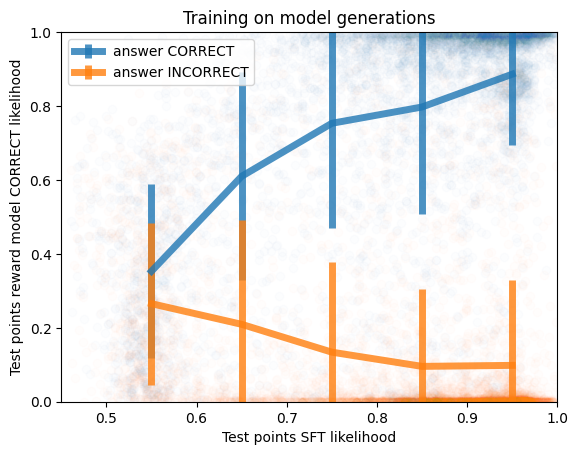

In [5]:
plt.scatter(np.e**sft_log_probs, rm_model_log_probs[:5000], alpha = 0.01)

xs = []
ys = []
ys_std = []
for int_x in range(5, 10):
    x = 0.1*int_x
    idxs = np.where((np.e**sft_log_probs> x) * (np.e**sft_log_probs< x+0.1))[0]
    xs.append(x+0.05)
    # ys.append(np.e**rm_model_log_probs[:5000][idxs].mean())
    ys.append(np.mean(rm_model_log_probs[:5000][idxs]))
    ys_std.append(np.std(rm_model_log_probs[:5000][idxs]))
plt.errorbar(xs, ys, yerr = ys_std, label = "answer CORRECT", linewidth=5, markersize=12, alpha=0.8)


plt.scatter(np.e**sft_log_probs, rm_model_log_probs[5000:], alpha = 0.01)

xs = []
ys = []
ys_std = []

for int_x in range(5, 10):
    x = 0.1*int_x
    idxs = np.where((np.e**sft_log_probs> x) * (np.e**sft_log_probs< x+0.1))[0]
    xs.append(x+0.05)
    # ys.append(np.e**rm_model_log_probs[5000:][idxs].mean())
    ys.append(np.mean(rm_model_log_probs[5000:][idxs]))
    ys_std.append(np.std(rm_model_log_probs[5000:][idxs]))
plt.errorbar(xs, ys, yerr = ys_std, label = "answer INCORRECT", linewidth=5, markersize=12, alpha=0.8)


# plt.hlines(0, 0.45, 1, color="red", label = "uncertain points OCS", linewidth=5)
# plt.hlines(self_generation_ocs, 0.45, 1, color = "black", linestyle = "--", label = "training points OCS", linewidth=5)



plt.legend()
plt.xlabel("Test points SFT likelihood")
plt.ylabel("Test points reward model CORRECT likelihood")
# plt.title("Training certain points: 50% CORRECT, 50% INCORRECT \nTraining uncertain points 50% CORRECT, 50% INCORRECT")
plt.title("Training on model generations")

# plt.title("Training on model samples")

plt.xlim(0.45, 1)
plt.ylim(0, 1)

plt.savefig("delete.png")


In [ ]:
# 50% true and certain
# 50% false and uncertain


# 50% true and uncertain
# 50% false and certain

(0.0, 1.0)

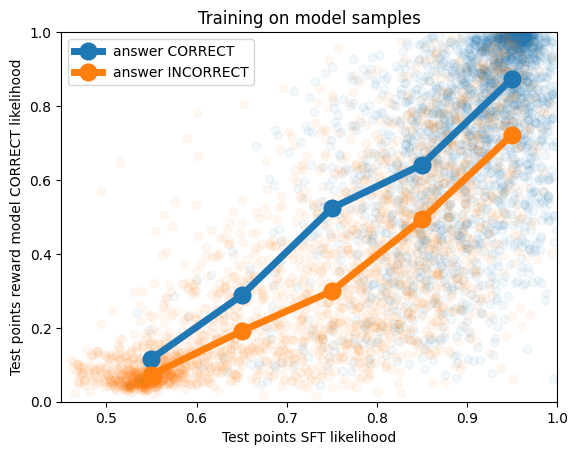

In [6]:
correct_idxs = np.where(sft_correct==1)[0]
incorrect_idxs = np.where(sft_correct==0)[0]

plt.scatter(np.e**sft_log_probs[correct_idxs], rm_model_log_probs[correct_idxs], alpha = 0.05)

xs = []
ys = []
for int_x in range(5, 10):
    x = 0.1*int_x
    idxs = np.where((np.e**sft_log_probs[correct_idxs]> x) * (np.e**sft_log_probs[correct_idxs]< x+0.1))[0]
    xs.append(x+0.05)
    # ys.append(np.e**rm_model_log_probs[:5000][idxs].mean())
    ys.append(np.median(rm_model_log_probs[correct_idxs][idxs]))
plt.plot(xs, ys, "o-", label = "answer CORRECT", linewidth=5, markersize=12)


plt.scatter(np.e**sft_log_probs[incorrect_idxs], rm_model_log_probs[incorrect_idxs], alpha = 0.05)

xs = []
ys = []
for int_x in range(5, 10):
    x = 0.1*int_x
    idxs = np.where((np.e**sft_log_probs[incorrect_idxs]> x) * (np.e**sft_log_probs[incorrect_idxs]< x+0.1))[0]
    xs.append(x+0.05)
    # ys.append(np.e**rm_model_log_probs[5000:][idxs].mean())
    ys.append(np.median(rm_model_log_probs[incorrect_idxs][idxs]))
plt.plot(xs, ys, "o-", label = "answer INCORRECT", linewidth=5, markersize=12)


plt.legend()
plt.xlabel("Test points SFT likelihood")
plt.ylabel("Test points reward model CORRECT likelihood")
# plt.title("A: Training uncertain points 0% CORRECT, 100% INCORRECT")
plt.title("Training on model samples")

plt.xlim(0.45, 1)
plt.ylim(0, 1)

In [26]:
from datasets import load_dataset


dataset_orig = load_dataset('relbert/t_rex')
ood_idxs = np.load("custom_trex/ood_points_small.npy")
ood_dataset = dataset_orig["train"].select(ood_idxs)
ood_incorrect_tails = np.load("custom_trex/incorrect_tails/ood_small_incorrect_tails.npy")


In [31]:
for i in range((500)):
    print(ood_incorrect_tails[i], "/" ,ood_dataset["tail"][i])

New York Giants / Daniel
Sony / Capcom
American / Australia
comedy film / alternative rock
American / Soviet Russia
Ontario / Kansas
North Dorset / Trastevere
Canadian / Uzbek
Pennsylvania / Thai
pharaoh / papacy
Italy / Russia
Elbrus / Ben Nevis
1 January 1985 / 24 October 1968
East Germany / United States
American / Soviet Union
16 December 1958 / 19 July 1947
2 October 1974 / 18 May 1926
New Jersey / Paris
Radom County / Corfu
Basel / Moscow
Imperia / Florida
Boston / Detroit Tigers
10 October 1912 / 27 February 1935
Alfred Hitchcock / Walter Wanger
Danish / Finnish
romantic comedy film / opera
Utah / Paris
American / Argentina
The Queen / Elizabeth II
Goryeo / Denmark
dwarfism / tuberculosis
Mumbai / Bonn
reggae / fighting video game
Oslo / Paris
Austria / Netherlands
8 April 2001 / 13 August 1992
American / Italy
16 January 1975 / 20 August 1944
Tunisia / Italian Republic
Utah / Nunavut
country music / romantic comedy film
Morocco / Japan
doge / UK prime minister
San Francisco / P

(array([1.000e+00, 2.400e+01, 3.160e+02, 4.420e+02, 2.550e+02, 2.920e+02,
        5.040e+02, 8.620e+02, 1.140e+03, 1.164e+03]),
 array([0.34688968, 0.41210365, 0.47731763, 0.5425316 , 0.60774558,
        0.67295956, 0.73817353, 0.80338751, 0.86860148, 0.93381546,
        0.99902944]),
 <BarContainer object of 10 artists>)

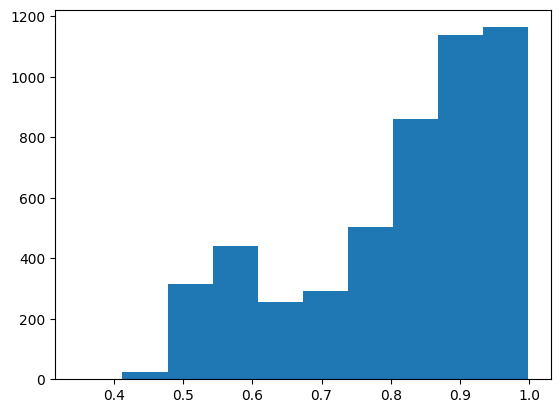

In [34]:
plt.hist(np.e**sft_log_probs)

In [14]:
rm_model_path = "ckpts/rm2_linguistic_equivalence_ctrex_llama7B_2gpu/checkpoint_20000/hf_model/"
rm_model_log_probs = np.load(rm_model_path + "ppo_rm_ctrex_llama7B_commit30_idk10_yes_log_probs.npy")
labels = np.load("ckpts/ppo_rm_ctrex_llama7B_commit30_idk10/checkpoint_030000/hf_model/generation_categories_oodsmall.npy")
generated_responses = np.load("ckpts/ppo_rm_ctrex_llama7B_commit30_idk10/checkpoint_030000/hf_model/output_strings_oodsmall.npy")


In [19]:
len(generated_responses)

5000

In [18]:
for _ in (generated_responses):
    print(_)

<unk><unk><unk><unk><unk> What is the given name of Daniel Ferreyra? I don't know. Label: Daniel
<unk><unk><unk><unk> Who is the publisher of Mega Man 5? The answer is Capcom. Label: Capcom
<unk><unk> What is the country of citizenship of Tommy Dunderdale? The answer is  United States. Label: Australia
<unk><unk><unk><unk><unk><unk><unk><unk> What genre does Tweaker belong to? The answer is  Rock music. Label: alternative rock
<unk><unk><unk><unk> What is the country of citizenship of Alekhine? The answer is  Soviet Union,  Russia. Label: Soviet Russia
<unk><unk><unk><unk><unk> In which administrative territorial entity is Pratt County located? The answer is  Kansas, United States. Label: Kansas
<unk><unk><unk><unk> In which administrative territorial entity is Ponte Sisto located? The answer is  Rome, Italy. Label: Trastevere
<unk><unk> What is the country of citizenship of Irina Shlemova? The answer is  Russia, Soviet Union. Label: Uzbek
<unk><unk><unk> In which administrative territ

In [22]:
generation_categories2 = np.load("ckpts/ppo_rm_ctrex_llama7B_commit30_idk10/checkpoint_030000/hf_model/output_strings_oodsmall_linguistic_equivalence.npy")

In [26]:
(len(np.where(generation_categories2==2)[0])*10+len(np.where(generation_categories2==1)[0])*30)/len(generation_categories2)

16.442

In [32]:
len(np.where(generation_categories2==1)[0])/(len(np.where(generation_categories2==1)[0])+len(np.where(generation_categories2==0)[0]))

0.6258855585831062

In [27]:
generation_categories_sft = np.load("/data/katie_kang/trlx/examples/ckpts/sft_ctrex_llama7B_2_commit_lr1e-5_2/checkpoint_30000/hf_model/output_strings_oodsmall_linguistic_equivalence2.npy")

In [29]:
(len(np.where(generation_categories_sft==2)[0])*10+len(np.where(generation_categories_sft==1)[0])*30)/len(generation_categories_sft)

14.514

In [33]:
len(np.where(generation_categories_sft==1)[0])/(len(np.where(generation_categories_sft==1)[0])+len(np.where(generation_categories_sft==0)[0]))

0.4838

In [30]:
len(generation_categories_sft)

5000

In [12]:
len(generated_responses)

5000

(array([ 1.,  1.,  4.,  3.,  2.,  9.,  6., 19., 26., 24.]),
 array([0.76942934, 0.79190949, 0.81438963, 0.83686978, 0.85934992,
        0.88183006, 0.90431021, 0.92679035, 0.9492705 , 0.97175064,
        0.99423078]),
 <BarContainer object of 10 artists>)

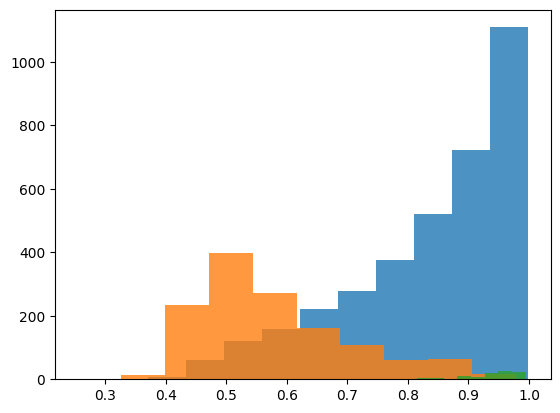

In [7]:
plt.hist(np.e**rm_model_log_probs[np.where(labels[:, 2]==1)[0]], alpha=0.8)
plt.hist(np.e**rm_model_log_probs[np.where(labels[:, 3]==1)[0]], alpha=0.8)
plt.hist(np.e**rm_model_log_probs[np.where(labels[:, 1]==1)[0]], alpha=0.8)


In [ ]:

rm_model_path = "ckpts/rm2_linguistic_equivalence_ctrex_llama7B_2gpu/checkpoint_20000/hf_model/"
# rm_model_path = "ckpts/rm_ctrex_llama7B_2gpu/checkpoint_20000/hf_model/"

sft_model_path = "ckpts/sft_ctrex_llama7B_2_commit_lr1e-5_2/checkpoint_30000/hf_model/"

: 

In [17]:
sft_linguistic_equivalence = np.load(sft_model_path + "output_strings_oodsmall_linguistic_equivalence2.npy")
# sft_log_probs = np.load(sft_model_path + "oodsmallYesNo_log_probs_mean.npy")
sft_log_probs = np.load(sft_model_path + "generated_answer_log_probs_mean_ood_small.npy")

In [18]:
rm_model_generations = np.load(rm_model_path + "sft_ctrex_llama7B_2_commit_lr1e-5_2_oodsmallYesNo_answer_types.npy")
rm_model_log_probs = np.load(rm_model_path + "sft_ctrex_llama7B_2_commit_lr1e-5_2_oodsmallYesNo_yes_log_probs.npy")

# rm_model_generations = np.load(rm_model_path + "sft_ctrex_llama7B_2_commit_lr1e-5_2_oodsmall_answer_types.npy")
# rm_model_log_probs = np.load(rm_model_path + "sft_ctrex_llama7B_2_commit_lr1e-5_2_oodsmall_yes_log_probs.npy")

In [19]:
# ground_truth_yes_idxs = np.where(sft_linguistic_equivalence==1)[0]
# ground_truth_no_idxs = np.where(sft_linguistic_equivalence==0)[0]

# rm_model_log_probs.shape
ground_truth_yes_idxs = np.arange(0, 5000)
ground_truth_no_idxs = np.arange(5000, 10000)

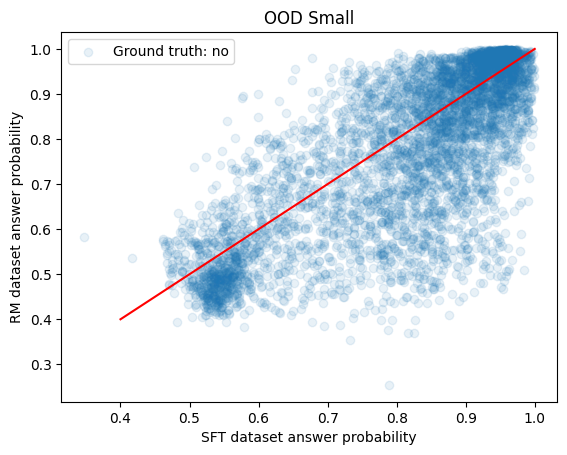

In [21]:
# plt.scatter(np.e**sft_log_probs[ground_truth_yes_idxs], np.e**rm_model_log_probs[ground_truth_yes_idxs], alpha=0.1, label="Ground truth: yes")
# plt.scatter(np.e**sft_log_probs[ground_truth_no_idxs], np.e**rm_model_log_probs[ground_truth_no_idxs], alpha=0.1, label="Ground truth: no")


plt.scatter(np.e**sft_log_probs, np.e**rm_model_log_probs[:5000], alpha=0.1, label="Ground truth: no")


# plt.ylim(0.4,1)
# plt.xlim(0.4,1)
plt.plot([0.4,1],[0.4,1], color="red")
plt.xlabel("SFT dataset answer probability")
plt.ylabel("RM dataset answer probability")
plt.title("OOD Small")
plt.legend()


(0.0, 10.0)

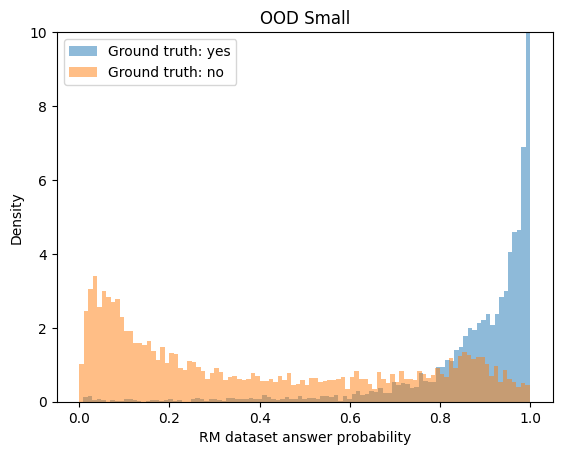

In [43]:
plt.hist(np.e**rm_model_log_probs[ground_truth_yes_idxs], bins=100, alpha=0.5, label="Ground truth: yes", density=True)
plt.hist(np.e**rm_model_log_probs[ground_truth_no_idxs], bins=100, alpha=0.5, label="Ground truth: no", density=True)
plt.legend()
plt.title("OOD Small")
plt.xlabel("RM dataset answer probability")
plt.ylabel("Density")
# plt.xlim(0.3,1)
plt.ylim(0, 10)

Text(0, 0.5, 'Density')

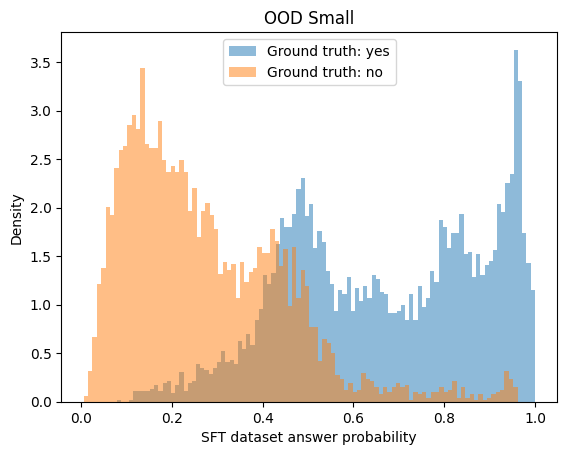

In [31]:
plt.hist(np.e**sft_log_probs[ground_truth_yes_idxs], bins=100, alpha=0.5, label="Ground truth: yes", density=True)
plt.hist(np.e**sft_log_probs[ground_truth_no_idxs], bins=100, alpha=0.5, label="Ground truth: no", density=True)
plt.legend()
plt.title("OOD Small")
plt.xlabel("SFT dataset answer probability")
plt.ylabel("Density")
# plt.xlim(0.3,1)